In [2]:
import sys
sys.path.append("../code")
import pandas as pd
import random
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import blotto_utils as bu
import agent_utils as au
import genetic_algorithm as ga

from agent import Agent

%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# 538 Data

In [3]:
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

data_dir = '/Users/Alex/Documents/Alex/Yale/Fall 2019/CPSC_490/blotto/data/'

fivethirtyeight_data_dir = data_dir + 'fivethirtyeight/'

data_files = sorted(glob(fivethirtyeight_data_dir + '*'))
train_list = []
test_list = []
for i in range(len(data_files)):
    print(i)
    temp_df = pd.read_csv(data_files[i])
    new_column_names = list(map((lambda x : '_'.join(x.split(' ')).lower()), list(temp_df.columns)))
    new_column_names[-1] = 'reason'

    temp_df.rename(dict(zip(list(temp_df.columns), new_column_names)), axis=1, inplace=True)

    temp_df['total_troops'] = temp_df['castle_1'] + \
                              temp_df['castle_2'] + \
                              temp_df['castle_3'] + \
                              temp_df['castle_4'] + \
                              temp_df['castle_5'] + \
                              temp_df['castle_6'] + \
                              temp_df['castle_7'] + \
                              temp_df['castle_8'] + \
                              temp_df['castle_9'] + \
                              temp_df['castle_10']

    full_strats_df = temp_df[temp_df.total_troops == 100].copy()
    full_strats_list = full_strats_df.to_dict('records')
    if i == 0:
        train_list += [[int(x[1]) for x in list(y.items())[:10]] for y in full_strats_list]
    else:
        test_list += [[int(x[1]) for x in list(y.items())[:10]] for y in full_strats_list]

0
1
2


In [4]:
len(train_list), len(test_list)

(1349, 2227)

In [5]:
sample_size = 100

## Divide into two players

In [5]:
random.seed(0)

a_strat_init = random.sample(train_list, sample_size)
b_strat_init = random.sample(train_list, sample_size)

len(a_strat_init), len(b_strat_init)

(100, 100)

# Co-Evolving Algorithm

# Entire GA

In [6]:
generations = 100
trials = int(1e4)

In [7]:
# random.seed(0)

## Iterative Generations

In [8]:
temp_noise = bu.generate_noise_arrays(1)

evaluate strategies against training data? - doesn't this defeat the whole purpose of genetic algorithm

In [9]:
temp_a_strats, temp_b_strats = a_strat_init, b_strat_init
best_a, best_b = [], []

In [10]:
for i in range(generations):
    temp_a_fittest, temp_b_fittest, temp_a_strats, temp_b_strats = ga.evolve(temp_a_strats, temp_b_strats, 1, temp_noise, mutate_func=ga.mutate_top, mutation_count=1)
    best_a.append(temp_a_fittest[0][0])
    best_b.append(temp_b_fittest[0][0])

In [11]:
len(best_a), len(best_b)

(100, 100)

agent generations

In [12]:
evol_lin_prog_agent_a, evol_lin_prog_agent_b = au.make_nash_agents(best_a, best_b)

In [13]:
agent_a, agent_b = Agent(best_a), Agent(best_b)

In [14]:
lin_prog_agent_a, lin_prog_agent_b = au.make_nash_agents(a_strat_init, b_strat_init)

In [17]:
print(au.play_game(evol_lin_prog_agent_a, agent_b, trials=trials),
au.play_game(evol_lin_prog_agent_a, lin_prog_agent_b, trials=trials),)

0.9054 0.5622


In [18]:
print(au.play_game(evol_lin_prog_agent_b, agent_a, trials=trials),
au.play_game(evol_lin_prog_agent_b, lin_prog_agent_a, trials=trials),)

0.7578 0.5913


## Testing GA, GA-Lin-Prog, Lin-Prog

In [67]:
random.seed(0)
sample_size = 100
test = 10
generations = 200
trials = int(1e4)
temp_noise = bu.generate_noise_arrays(1)
agents = {}
agents['evol lin prog a'] = []
agents['evol lin prog b'] = []
agents['lin prog a'] = []
agents['lin prog b'] = []
agents['agent a'] = []
agents['agent b'] = []

results = {}
results['evol lin prog a v. agent b'] = []
results['evol lin prog b v. agent a'] = []
results['lin prog a v. agent b'] = []
results['lin prog b v. agent a'] = []
results['evol lin prog a v. lin prog b'] = []
results['evol lin prog b v. lin prog a'] = []

for _ in range(test):
    print(_)
    a_strat_init = random.sample(train_list, sample_size)
    b_strat_init = random.sample(train_list, sample_size)

    # Entire GA

    # evaluate strategies against training data? - doesn't this defeat the whole purpose of genetic algorithm

    temp_a_strats, temp_b_strats = a_strat_init, b_strat_init
    best_a, best_b = [], []
    temp_a_fittest, temp_b_fittest, temp_a_strats, temp_b_strats = ga.evolve(temp_a_strats, temp_b_strats, 100, temp_noise, mutate_func=ga.mutate_top, mutation_count=1)

    for i in range(generations-100):
        temp_a_fittest, temp_b_fittest, temp_a_strats, temp_b_strats = ga.evolve(temp_a_strats, temp_b_strats, 1, temp_noise, mutate_func=ga.mutate_top, mutation_count=1)
        best_a.append(temp_a_fittest[0][0])
        best_b.append(temp_b_fittest[0][0])

    evol_lin_prog_agent_a, evol_lin_prog_agent_b = au.make_nash_agents(best_a, best_b)
    agent_a, agent_b = Agent(best_a), Agent(best_b)
    lin_prog_agent_a, lin_prog_agent_b = au.make_nash_agents(a_strat_init, b_strat_init)
    
    results['evol lin prog a v. agent b'].append(au.play_game(evol_lin_prog_agent_a, agent_b, trials=trials))
    results['evol lin prog b v. agent a'].append(au.play_game(evol_lin_prog_agent_b, agent_a, trials=trials))
    results['lin prog a v. agent b'].append(au.play_game(lin_prog_agent_a, agent_b, trials=trials))
    results['lin prog b v. agent a'].append(au.play_game(lin_prog_agent_b, agent_a, trials=trials))
    results['evol lin prog a v. lin prog b'].append(au.play_game(evol_lin_prog_agent_a, lin_prog_agent_b, trials=trials))
    results['evol lin prog b v. lin prog a'].append(au.play_game(evol_lin_prog_agent_b, lin_prog_agent_a, trials=trials))
    
    agents['evol lin prog a'].append(evol_lin_prog_agent_a)
    agents['evol lin prog b'].append(evol_lin_prog_agent_b)
    agents['lin prog a'].append(lin_prog_agent_a)
    agents['lin prog b'].append(lin_prog_agent_b)
    agents['agent a'].append(agent_a)
    agents['agent b'].append(agent_b)

0
1
2
3
4
5
6
7
8
9


In [68]:
import statistics as stat

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text yticklabel objects>)

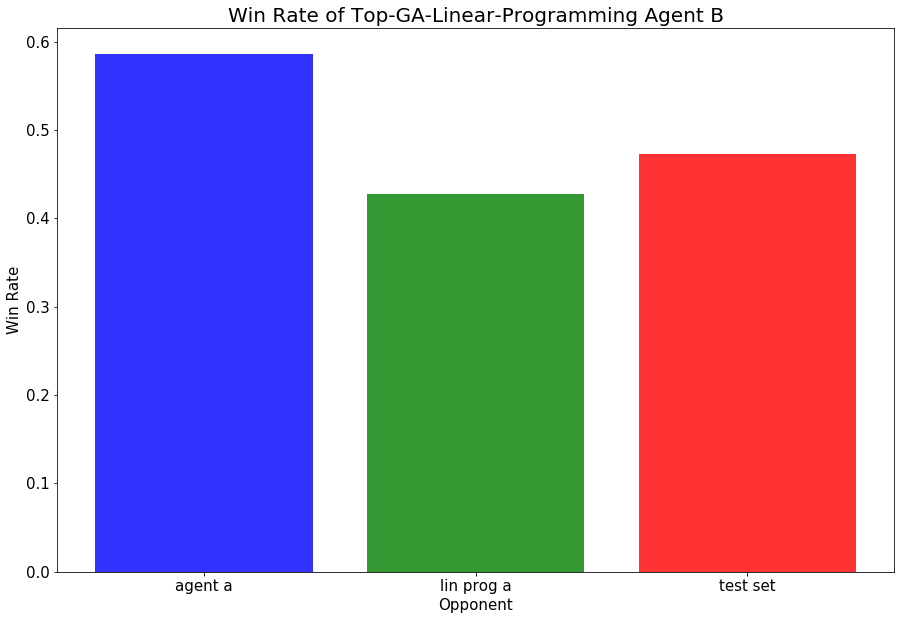

In [71]:
plt.figure(figsize=(15, 10))

plt.bar(['agent a', 'lin prog a', 'test set'], [stat.mean(x) for x in [results['evol lin prog b v. agent a'][:], 
                                                                        results['evol lin prog b v. lin prog a'][:1],
                                                                       [au.play_game(agent, test_list, trials=len(test_list)) for agent in agents['evol lin prog b'][:]]]], alpha=0.8, color=['b', 'g', 'r'])
plt.title("Win Rate of Top-GA-Linear-Programming Agent B", fontsize=20)
plt.xlabel("Opponent", fontsize=15)
plt.ylabel("Win Rate", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.legend(prop={'size':18})
# plt.show()
# plt.savefig("../figures/top-ga-linear-programming-b.jpg")

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text yticklabel objects>)

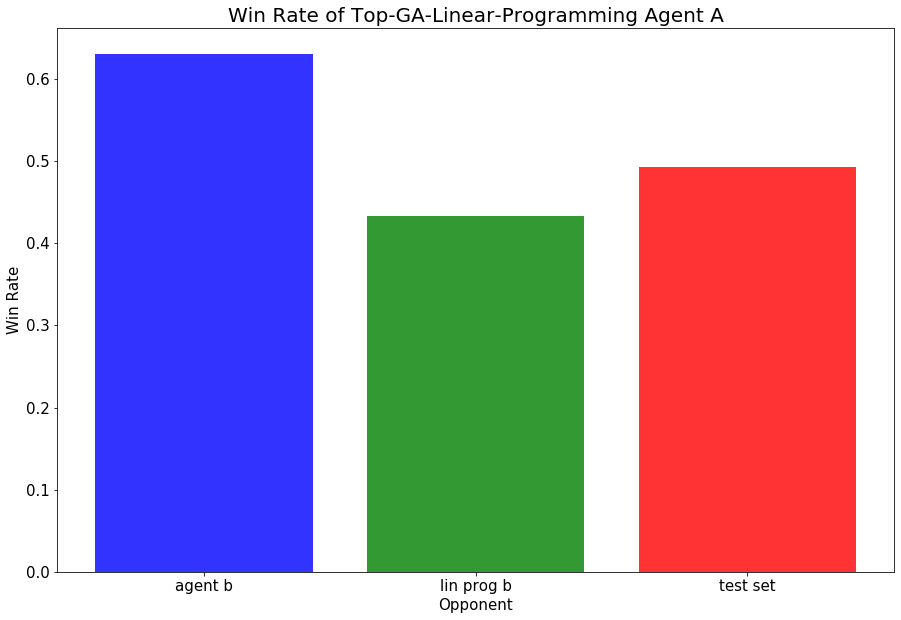

In [72]:
plt.figure(figsize=(15, 10))

plt.bar(['agent b', 'lin prog b', 'test set'], [stat.mean(x) for x in [results['evol lin prog a v. agent b'][:], 
                                                                       results['evol lin prog a v. lin prog b'][:1],
                                                                       [au.play_game(agent, test_list, trials=len(test_list)) for agent in agents['evol lin prog a'][:]]]], alpha=0.8, color=['b', 'g', 'r'])
plt.title("Win Rate of Top-GA-Linear-Programming Agent A", fontsize=20)
plt.xlabel("Opponent", fontsize=15)
plt.ylabel("Win Rate", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.legend(prop={'size':18})
# plt.show()
# plt.savefig("../figures/top-ga-linear-programming-a.jpg")

In [40]:
for agent in agents['lin prog a']:
    print(au.play_game(agent, test_list, trials=len(test_list)))

0.48720251459362374
0.5163897620116749
0.5114503816793893
0.5047148630444545
0.4732824427480916
0.512348450830714
0.5433318365514145
0.4818140996856758
0.48091603053435117
0.511001347103727


In [37]:
results['evol lin prog a v. lin prog b']

[0.499,
 0.538,
 0.4061,
 0.4071,
 0.28459999999999996,
 0.391,
 0.25170000000000003,
 0.5746,
 0.4896,
 0.4313]

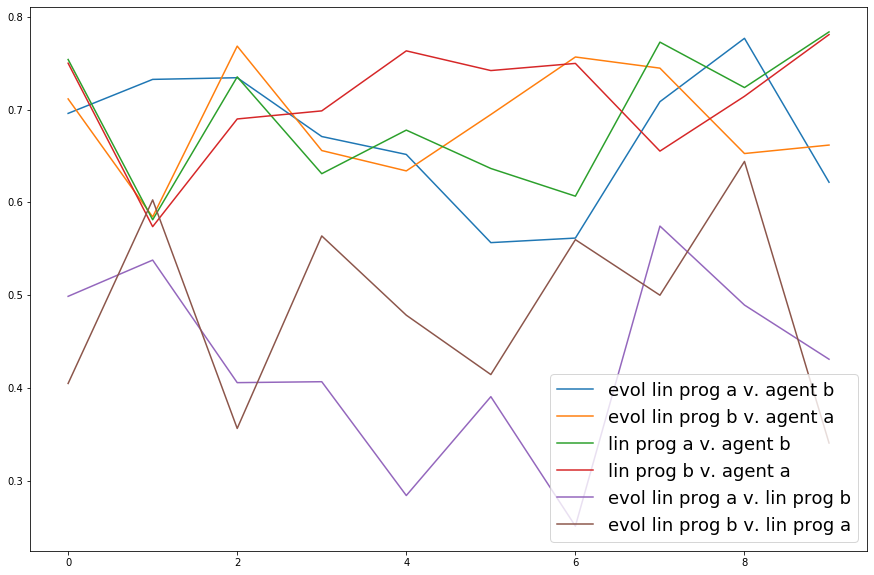

In [38]:
plt.figure(figsize=(15, 10))
for key, value in results.items():
    plt.plot(list(range(test)), value, label=key)
# plt.title("Linear Programming Agent on Training Data across input size", fontsize=20)
# plt.xlabel("Sample Size", fontsize=15)
# plt.ylabel("Win Percentage", fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.legend(prop={'size':18})
plt.show()

## Mixed Strategies